In [3]:
#conda activate AP1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from scipy.stats import skew, kurtosis

import pyfolio as pf
import empyrical as emp

In [4]:
df = pd.read_excel('data_nn.xlsx')
#df.to_pickle("data_nn.xlsx")

In [5]:
# Set the first column as the date index
df.set_index(df.columns[0], inplace=True)

# Convert the index to string and then to DatetimeIndex format
df.index = pd.to_datetime(df.index.astype(str))

# Filter the data for the last ten years
df_last_10_years = df.loc[df.index > "1970-01-02"]


# Apply rolling sum with a window of 252 and require at least 126 non-NaN values
df_rolling_sum = df_last_10_years.rolling(window=252, min_periods=int(252//2)).sum()

# Forward-fill NaN values, but limit this to a maximum of 5 consecutive fills
df_filled = df_last_10_years.ffill(limit=5)

# Drop any remaining NaN values that still exist after the forward-fill operation
df_cleaned = df_filled.dropna()

#return back original name to not interruppt code.
df_last_10_years = df_cleaned




In [6]:
def refactored_advanced_features(df_returns):
    """
    Refactored computation of advanced financial features to reduce DataFrame fragmentation.
    """
    skew = {}
    kurtosis = {}
    max_drawdown = {}
    volatility = {}
    vaR = {}
    momentum = {}
    avg_return = {}
    rsi = {}

        
        # 1. Skewness
    print("Skewness")
    for window in [20, 40, 60, 100, 180, 240, 360, 480]:
        skew[window] = df_returns.rolling(window).skew()

        # 2. Kurtosis
    print("Kurtosis")
    for window in [20, 40, 60, 100, 180, 240, 360, 480]:
        kurtosis[window]=df_returns.rolling(window).kurt()
    
    # 3. Maximum drawdown
    print("Maximum drawdown")
    for window in [20, 40, 60, 100, 180, 240, 360, 480]:
        max_drawdown[window] = df_returns.rolling(window).apply(emp.max_drawdown, raw=True)
    
    # 4. Volatility
    print("Volatility")
    for window in [20, 40, 60, 100, 180, 240, 360, 480]:
        volatility[window] = df_returns.rolling(window).std()*(252**0.5)
    
    # 5. Value at Risk
    print("Value at Risk")
    for window in [20, 40, 60, 100, 180, 240, 360, 480]:
        vaR[window] = df_returns.rolling(window).apply(emp.value_at_risk, raw=True)
    
    # 6. Momentum
    print("Momentum")
    for window in [20, 40, 60, 100, 180, 240, 360, 480]:
        momentum[window] = df_returns.rolling(window).sum() # ?

    print("Average Return")
    for window in [20, 40, 60, 100, 180, 240, 360, 480]:
        avg_return[window] = df_returns.rolling(window).mean()
    
    return skew, kurtosis, max_drawdown, volatility, vaR, momentum, avg_return

# This function reduces DataFrame fragmentation by constructing all columns and concatenating them at once.

# Läs tommys mex hur de gjorde reversal, sen implementera det. Fixa windows size till vad de hade i rapporten.
# skew[20].head() 

In [7]:
# Call the function and capture the output
skew, kurtosis, max_drawdown, volatility, vaR, momentum, avg_return = refactored_advanced_features(df_last_10_years)


Skewness
Kurtosis
Maximum drawdown
Volatility
Value at Risk
Momentum
Average Return


In [8]:
# Reset the feature DataFrames list
features_df_list = []

# Create individual lists for each feature's DataFrame
skew_df_list = [] 
kurtosis_df_list = []
max_drawdown_df_list = []
volatility_df_list = []
vaR_df_list = []
momentum_df_list = []
avg_return_df_list = []

# Windows configuration
windows = [20, 40, 60, 100, 180, 240, 360, 480]

# Iterate through each feature dictionary and create a DataFrame
for feature_name, feature_dict in [('skew', skew), ('kurtosis', kurtosis), ('max_drawdown', max_drawdown), 
                                   ('volatility', volatility), ('vaR', vaR), ('momentum', momentum), ('avg_return', avg_return)]:
    # Only keep the windows that are present for each feature
    relevant_windows = windows if feature_name != 'kurtosis' else windows[:-1]
    feature_df = pd.concat({f'{feature_name}_{window}': feature_dict[window] for window in relevant_windows}, axis=1)
    
    # Append the individual DataFrame to the corresponding feature list
    if feature_name == 'skew':
        skew_df_list.append(feature_df)
    elif feature_name == 'kurtosis':
        kurtosis_df_list.append(feature_df)
    elif feature_name == 'max_drawdown':
        max_drawdown_df_list.append(feature_df)
    elif feature_name == 'volatility':
        volatility_df_list.append(feature_df)
    elif feature_name == 'vaR':
        vaR_df_list.append(feature_df)
    elif feature_name == 'momentum':
        momentum_df_list.append(feature_df)
    elif feature_name == 'avg_return':
        avg_return_df_list.append(feature_df)
    
    # Add the DataFrame to the main list
    features_df_list.append(feature_df)


# Concatenate all feature DataFrames into a single DataFrame
features_df = pd.concat(features_df_list, axis=1)

# Concatenate all feature DataFrames into a single DataFrame for each feature
if len(skew_df_list) > 1:
    skew_df = pd.concat(skew_df_list, axis=1)
if len(kurtosis_df_list) > 1:
    kurtosis_df = pd.concat(kurtosis_df_list, axis=1)
if len(max_drawdown_df_list) > 1:
    max_drawdown_df = pd.concat(max_drawdown_df_list, axis=1)
if len(volatility_df_list) > 1:
    volatility_df = pd.concat(volatility_df_list, axis=1)
if len(vaR_df_list) > 1:
    vaR_df = pd.concat(vaR_df_list, axis=1)
if len(momentum_df_list) > 1:
    momentum_df = pd.concat(momentum_df_list, axis=1)
if len(avg_return_df_list) > 1:
    avg_return_df = pd.concat(avg_return_df_list, axis=1)



# The individual lists for each feature now contain their respective DataFrames
# And features_df_list contains all the feature DataFrames
# Let's print the first item of each sublist to confirm
#print("Skew DataFrame:\n", skew_df_list[0].tail(), "\n")
#print("Kurtosis DataFrame:\n", kurtosis_df_list[0].tail(), "\n")
#print("Max Drawdown DataFrame:\n", max_drawdown_df_list[0].tail(), "\n")
#print("Volatility DataFrame:\n", volatility_df_list[0].tail(), "\n")
#print("VaR DataFrame:\n", vaR_df_list[0].tail(), "\n")
#print("Momentum DataFrame:\n", momentum_df_list[0].tail(), "\n")
#print("Average Return DataFrame:\n", avg_return_df_list[0].tail(), "\n")

# Print the last 5 rows of the combined DataFrame
features_df.tail()

skew_20                                                         \
           Equities_0 Equities_1 Equities_2 Equities_3 Equities_4 Equities_5   
Column1                                                                        
2023-02-20  -0.240833  -0.198584   0.748803  -0.034554   0.183471  -0.216372   
2023-02-21  -0.086253  -0.070400   0.773535   0.011176   0.312154  -0.041571   
2023-02-22  -0.128589  -0.062873   0.757504  -0.109515   0.415347   0.052482   
2023-02-23  -0.023004   0.106261   0.830820  -0.006954   0.265489   0.092309   
2023-02-24   0.050596   0.138392   0.864532   0.148482   0.428164   0.081861   

                                                        ...  avg_return_480  \
           Equities_6 Equities_7 Equities_8 Equities_9  ... Equity_Sector_1   
Column1                                                 ...                   
2023-02-20   0.256436  -0.157259   1.524128   0.163826  ...        0.000223   
2023-02-21   0.221016  -0.162284   1.521845  -0.296421  ...        0.000203   
2023-02-22   0.191846  -0.470390   1.486008  -0.301710  ...        0.000189   
2023-02-23   0.325509  -0.476984   1.454702  -0.274151  ...        0.000200   
2023-02-24   0.420396  -0.548086   1.506494  -0.256232  ...        0.000202   

                                                                            \
           Equity_Sector_2 Equity_Sector_3 Equity_Sector_4 Equity_Sector_5   
Column1                                                                      
2023-02-20        0.001289        0.000093        0.000232        0.000087   
2023-02-21        0.001335        0.000089        0.000194        0.000060   
2023-02-22        0.001290        0.000056        0.000162        0.000026   
2023-02-23        0.001304        0.000074        0.000161        0.000030   
2023-02-24        0.001269        0.000031        0.000141        0.000001   

                                                                            \
           Equity_Sector_6 Equity_Sector_7 Equity_Sector_8 Equity_Sector_9   
Column1                                                                      
2023-02-20        0.000005        0.000010       -0.000008       -0.000610   
2023-02-21       -0.000026       -0.000004       -0.000074       -0.000646   
2023-02-22       -0.000051       -0.000029       -0.000105       -0.000646   
2023-02-23       -0.000030        0.000023       -0.000123       -0.000627   
2023-02-24       -0.000062        0.000002       -0.000159       -0.000647   

                             
           Equity_Sector_10  
Column1                      
2023-02-20         0.000152  
2023-02-21         0.000083  
2023-02-22         0.000094  
2023-02-23         0.000099  
2023-02-24         0.000093  

[5 rows x 3080 columns]

In [9]:
def RSI(df_returns, window):
    """
    Computes the Relative Strength Index (RSI) for a given window.
    """
    df = df_returns.copy()
    df[df >= 0] = 1
    df[df < 0] = 0
    df = df.rolling(window).mean()*100
    return df

RSI skip for now

In [10]:
# Initialize an empty dictionary to store the last RSI value for each window
rsi_values = {}

# Calculate RSI for each window and store the last value
for window in [20, 40, 60, 100, 180, 240, 360, 480]:
    rsi_df = RSI(df_last_10_years, window)  # df_returns is your DataFrame with returns data
    last_rsi_value = rsi_df.iloc[-1]  # Get the last row of the RSI DataFrame
    rsi_values[window] = last_rsi_value  # Store it in the dictionary with the window as the key

# Print the last RSI value for a 20-day window
print("Last RSI value for 20-day window:")
print(rsi_values[20])




Last RSI value for 20-day window:
Equities_0          35.0
Equities_1          40.0
Equities_2          45.0
Equities_3          55.0
Equities_4          30.0
Equities_5          30.0
Equities_6          55.0
Equities_7          40.0
Equities_8          30.0
Equities_9          60.0
Equities_10         60.0
Equities_11         40.0
Equities_12         40.0
Equities_13         50.0
Equities_14         40.0
Equities_15         55.0
Equities_16         25.0
FX_0                30.0
FX_1                40.0
FX_2                35.0
FX_3                40.0
FX_4                35.0
FX_5                50.0
FX_6                45.0
FX_7                35.0
FX_8                60.0
FX_9                30.0
FX_10               35.0
FX_11               35.0
FX_12               45.0
FX_13               55.0
Bonds_0             35.0
Bonds_1             45.0
Bonds_2             45.0
Bonds_3             40.0
Bonds_4             40.0
Bonds_5             35.0
Bonds_6             35.0
Bonds_7         

Forming the DF

In [11]:
# Define the assets and windows outside of the function for clarity
assets = [
    'Equities_0', 'Equities_1', 'Equities_2', 'Equities_3', 'Equities_4', 'Equities_5', 'Equities_6', 'Equities_7',
    'Equities_8', 'Equities_9', 'Equities_10', 'Equities_11', 'Equities_12', 'Equities_13', 'Equities_14', 'Equities_15',
    'Equities_16', 'FX_0', 'FX_1', 'FX_2', 'FX_3', 'FX_4', 'FX_5', 'FX_6', 'FX_7', 'FX_8', 'FX_9', 'FX_10', 'FX_11',
    'FX_12', 'FX_13', 'Bonds_0', 'Bonds_1', 'Bonds_2', 'Bonds_3', 'Bonds_4', 'Bonds_5', 'Bonds_6', 'Bonds_7', 'Bonds_8',
    'Bonds_9', 'Bonds_10', 'Bonds_11', 'Bonds_12', 'Bonds_13', 'Equity_Sector_0', 'Equity_Sector_1', 'Equity_Sector_2',
    'Equity_Sector_3', 'Equity_Sector_4', 'Equity_Sector_5', 'Equity_Sector_6', 'Equity_Sector_7', 'Equity_Sector_8',
    'Equity_Sector_9', 'Equity_Sector_10'
]
windows = [20, 40, 60, 100, 180, 240, 360, 480]

# Generate the final DataFrame
final_rows = []
for date in df_last_10_years.index:
    for asset in assets:
        row = [date, asset]
        for feature_name, feature_dict in [('skew', skew), ('kurtosis', kurtosis), ('max_drawdown', max_drawdown), 
                                           ('volatility', volatility), ('vaR', vaR), ('momentum', momentum), 
                                           ('avg_return', avg_return)]:
            for window in windows:
                # Check if the window exists for this feature, if not, use NaN
                value = feature_dict[window].loc[date, asset] if window in feature_dict else float('nan')
                row.append(value)
        final_rows.append(row)

# Define the column names for the final DataFrame
column_names = ['Date', 'Asset']
for feature_name in ['skew', 'kurtosis', 'max_drawdown', 'volatility', 'vaR', 'momentum', 'avg_return']:
    for window in windows:
        column_names.extend([f'{feature_name}_{window}'])

# Now create the DataFrame
final_df = pd.DataFrame(final_rows, columns=column_names)

# Show the first few rows of the DataFrame
print(final_df.tail())


             Date             Asset   skew_20   skew_40   skew_60  skew_100  \
284867 2023-02-24   Equity_Sector_6  0.526400  0.257828  0.081595  0.827986   
284868 2023-02-24   Equity_Sector_7  0.256501  0.495935  0.103227  0.486835   
284869 2023-02-24   Equity_Sector_8  0.818443  0.520856  0.358629  1.111640   
284870 2023-02-24   Equity_Sector_9  1.429924  0.867425  0.432064  0.348426   
284871 2023-02-24  Equity_Sector_10 -0.185238 -0.284520 -0.171236  0.250022   

        skew_180  skew_240  skew_360  skew_480  ...  momentum_360  \
284867  0.395703  0.093499  0.083147  0.024990  ...     -0.115211   
284868  0.442083  0.166631  0.107450  0.082749  ...      0.023760   
284869  0.656045  0.191849  0.122967  0.063018  ...     -0.150483   
284870  0.190163  0.044191 -0.114346 -0.165398  ...     -0.373065   
284871 -0.052785 -0.211851 -0.250760 -0.252899  ...      0.061617   

        momentum_480  avg_return_20  avg_return_40  avg_return_60  \
284867     -0.029955      -0.001087      

## Model Free

Key Changes:
1. Updated Sharpe Ratio Loss: The loss function now accepts both the weights output by the model and the target returns for the next day, using these to calculate the portfolio returns and then the Sharpe Ratio.

2. Target Returns Preparation: The target returns for the next day (target_returns_for_next_day) are prepared by shifting the returns data.

3. Training Loop Adjustments: In the training loop, the loss is calculated using both the weights and the target returns for the next day.

4. Data Splitting and Scaling: The data is split into training and test sets, with the target returns aligned with the feature data.

5. Splitting the data over time instead of doing it randomly

6. Changed y to y_test in portfolio_returns

7. Retraining the Neural Network: The network is now retrained for each period in date_range.

8. Data Slicing for X_test and y_test: Adjusted to select data 5 days forward from the current date in the loop.

9. Forward-Filling Weights: Implemented using pd.DataFrame.resample('B').ffill() to fill weights for days when the model does not recalculate them.

10. Sharpe Ratio Calculation: This part is not included in the snippet due to the complexity of the task and the need for specific loss calculation based on the filled weights and actual returns.


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import matplotlib.pyplot as plt
import sys

# Define the neural network model
class MultivariateNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MultivariateNN, self).__init__()
        self.input_layer = nn.Linear(input_dim, hidden_dim)
        self.hidden_layer = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        x = F.leaky_relu(self.input_layer(x))
        x = F.softmax(self.hidden_layer(x), dim=1)
        return x

# Custom Sharpe Ratio Loss
class SharpeRatioLoss(nn.Module):
    def __init__(self, risk_free_rate=0):
        super(SharpeRatioLoss, self).__init__()
        self.risk_free_rate = risk_free_rate

    def forward(self, weights, target_returns):
        if weights.shape != target_returns.shape:
            weights = weights.view_as(target_returns)
        portfolio_returns = (weights * target_returns)
        expected_return = portfolio_returns.mean()
        std_dev_return = portfolio_returns.std()
        sharpe_ratio = (expected_return - self.risk_free_rate) / (std_dev_return + 1e-6)
        return -sharpe_ratio

# Assuming 'feature_df' and 'df_last_10_years' are your datasets as pandas DataFrames
calculated_features_df = pd.DataFrame(feature_df)
#features_df = calculated_features_df.fillna(calculated_features_df.mean())
X = features_df
y = df_last_10_years.drop(columns=df_last_10_years.columns[0])

start_date = '1970-01-08'  # Start date
look_ahead = 5  # 5 business days ahead
target_y = y.shift(-look_ahead).dropna(how='all')  # Target y shifted 5 days ahead

# Initialize variables for weights, dates, and Sharpe Ratios
weights_over_time = []
dates_over_time = []
sharpe_ratios_over_time = []

# Adjust the date range for training
end_date = target_y.index[-look_ahead - 1]  # Adjusted end date
date_range = pd.date_range(start=start_date, end=end_date, freq=f'{look_ahead}B')

for d in tqdm(date_range):
    future_date = d + pd.offsets.BDay(look_ahead)
    if d not in X.index or future_date not in X.index:
        continue
    X_train = X.loc[d - pd.offsets.BDay(400):d - pd.offsets.BDay(2)]
    y_train = target_y.loc[d - pd.offsets.BDay(400):d - pd.offsets.BDay(2)]

    #if len(X_train) == 0 or len(y_train) == 0:
       # continue #first iteration gives the 

    X_test = X.loc[[d + pd.offsets.BDay(look_ahead)]]
    y_test = target_y.loc[[d + pd.offsets.BDay(look_ahead)]]
    dates_over_time.append(y_test.index)
    
    # Scaling the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = np.nan_to_num(X_train_scaled)
    X_test_scaled = np.nan_to_num(X_test_scaled)
    
    X_train_tensor = torch.FloatTensor(X_train_scaled)
    X_test_tensor = torch.FloatTensor(X_test_scaled)
    y_train_tensor = torch.FloatTensor(y_train.values)
    y_test_tensor = torch.FloatTensor(y_test.values)
    
    # Initialize the neural network model
    input_dim = X_train_tensor.shape[1]
    hidden_dim = 32
    output_dim = y_train_tensor.shape[1]
    model = MultivariateNN(input_dim, hidden_dim, output_dim)
    
    # Loss and optimizer
    criterion = SharpeRatioLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    
    # Training loop
    epochs = 50
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        weights = model(X_train_tensor)
        loss = criterion(weights, y_train_tensor)
        loss.backward()
        optimizer.step()
        
        model.eval() #ska denna vara innanför eller utanför denna for loop?
    with torch.no_grad():
        test_output = model(X_test_tensor)
        test_loss = criterion(test_output, y_test_tensor)
        normalized_predicted_weights = test_output.cpu().numpy() / np.sum(test_output.cpu().numpy(), axis=1, keepdims=True)
        weights_over_time.append(normalized_predicted_weights)
        sharpe_ratios_over_time.append(-test_loss.item())


d_new = [item for sublist in dates_over_time for item in sublist]
w_new = [item for sublist in weights_over_time for item in sublist]
w_df = pd.DataFrame(index = d_new, data = w_new, columns = y.columns)
w_df_filled = w_df.resample('B').ffill()

# Calculating returns and Sharpe Ratio
portfolio_returns = w_df_filled.multiply(y).dropna(how='all')
cumulative_returns = portfolio_returns.sum(axis=1).cumsum()




  0%|          | 0/2771 [00:00<?, ?it/s]/Users/marre/anaconda3/envs/AP3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/marre/anaconda3/envs/AP3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/marre/anaconda3/envs/AP3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
 63%|██████▎   | 1751/2771 [00:00<00:00, 9494.22it/s]/Users/marre/anaconda3/envs/AP3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/marre/anaconda3/envs/AP3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: inva

## Plot Model Free

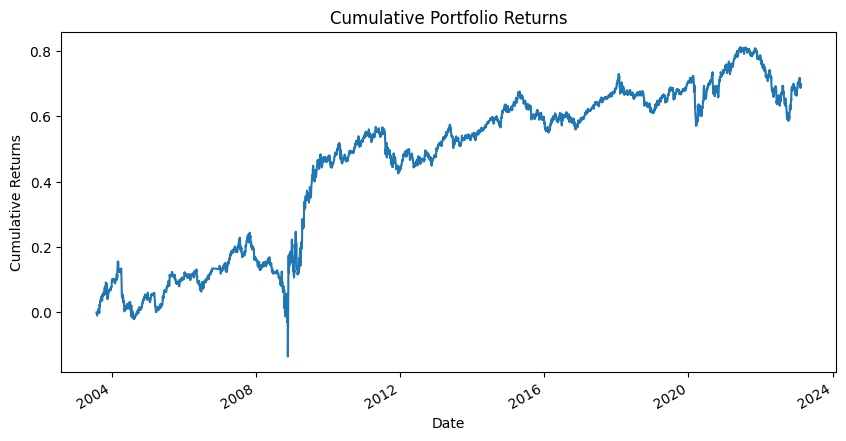

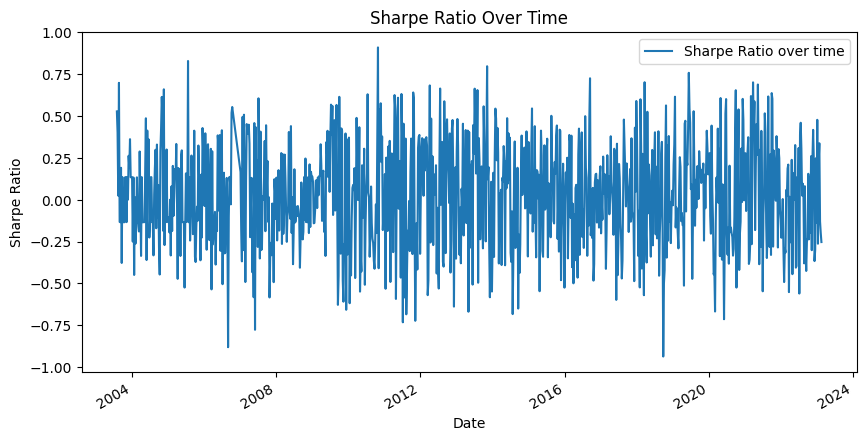

In [13]:
# Plot cumulative returns
plt.figure(figsize=(10, 5))
cumulative_returns.plot(title='Cumulative Portfolio Returns')
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.show()

# Plot Sharpe Ratio over time
plt.figure(figsize=(10, 5))
plt.plot(dates_over_time, sharpe_ratios_over_time, label="Sharpe Ratio over time")
plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratio Over Time")
plt.legend()
plt.gcf().autofmt_xdate()  # Auto-format the x-axis dates
plt.show()

## model based  (InverseVol)

  0%|          | 0/161 [00:00<?, ?it/s]

/var/folders/k0/cmqp2p3x3q5dbb9m49x2jdh00000gn/T/ipykernel_6421/2277670247.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  optimized_weights_tensor = torch.tensor(optimized_weights_normalized, dtype=torch.float32, requires_grad=True)
  1%|          | 1/161 [00:38<1:43:52, 38.95s/it]/var/folders/k0/cmqp2p3x3q5dbb9m49x2jdh00000gn/T/ipykernel_6421/2277670247.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  optimized_weights_tensor = torch.tensor(optimized_weights_normalized, dtype=torch.float32, requires_grad=True)
  1%|          | 2/161 [01:17<1:42:22, 38.63s/it]/var/folders/k0/cmqp2p3x3q5dbb9m49x2jdh00000gn/T/ipykernel_6421/2277670247.py:42: UserWarning: To copy construct from a 

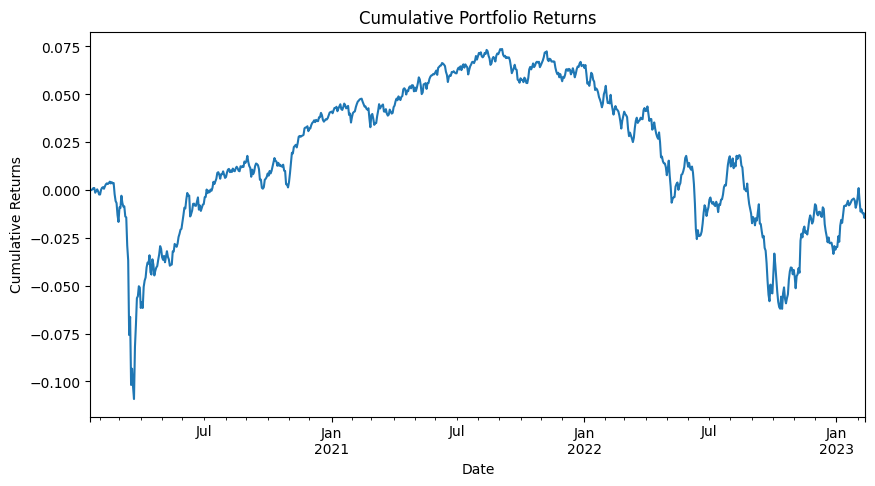

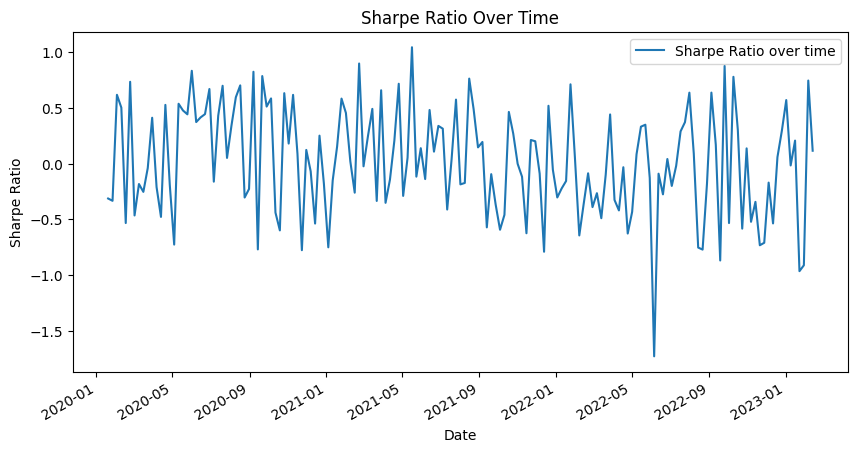

In [60]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import matplotlib.pyplot as plt
import cvxpy as cp
from cvxpylayers.torch import CvxpyLayer

class RiskBudgetingLayer(nn.Module):
    def __init__(self, n_assets):
        super(RiskBudgetingLayer, self).__init__()
        self.b = cp.Parameter(n_assets)  # risk budgets
        self.sigma = cp.Parameter(n_assets)  # standard deviations parameter
        self.w = cp.Variable(n_assets)  # portfolio weights

        # Constraints
        constraints = [cp.multiply(self.w,self.sigma) == self.b]  # sum of weights = 1
        # Objective function
        objective = cp.Maximize(cp.sum(self.w))

        # Create the CVXPY problem
        self.problem = cp.Problem(objective, constraints)
        self.cvxpylayer = CvxpyLayer(self.problem, parameters=[self.b, self.sigma], variables=[self.w])

    def forward(self, b, sigma):
        # Convert sigma to a PyTorch tensor with data type float32
        sigma = torch.tensor(sigma).float()

        # Solve the problem using CvxpyLayer
        optimized_weights, = self.cvxpylayer(b, sigma)

        # Normalize the weights
        sum_weights = torch.sum(optimized_weights)
        optimized_weights_normalized = optimized_weights / sum_weights

        # Convert to tensor
        optimized_weights_tensor = torch.tensor(optimized_weights_normalized, dtype=torch.float32, requires_grad=True)

        return optimized_weights_tensor

class MultivariateNNWithRiskBudgeting(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_assets):
        super(MultivariateNNWithRiskBudgeting, self).__init__()
        self.input_layer = nn.Linear(input_dim, hidden_dim)
        self.hidden_layer = nn.Linear(hidden_dim, output_dim)
        self.risk_budget_layer = RiskBudgetingLayer(num_assets)

    def forward(self, x, sigma):
        x = F.leaky_relu(self.input_layer(x))
        b = F.softmax(self.hidden_layer(x), dim=1)  # risk budgets
        optimized_weights = self.risk_budget_layer(b, sigma)
        return optimized_weights

class SharpeRatioLoss(nn.Module):
    def __init__(self, risk_free_rate=0):
        super(SharpeRatioLoss, self).__init__()
        self.risk_free_rate = risk_free_rate

    def forward(self, weights, target_returns):
        weights = weights.view(-1, target_returns.size(1))
        portfolio_returns = (weights * target_returns)
        expected_return = portfolio_returns.mean()
        std_dev_return = portfolio_returns.std()
        sharpe_ratio = (expected_return - self.risk_free_rate) / (std_dev_return + 1e-6)
        return -sharpe_ratio

# Assuming 'feature_df' and 'df_last_10_years' are your datasets as pandas DataFrames
calculated_features_df = pd.DataFrame(feature_df)
X = features_df
y = df_last_10_years.drop(columns=df_last_10_years.columns[0])

# Convert the DataFrame to a PyTorch tensor
y_tensor = torch.FloatTensor(y.values)

# Compute the covariance matrix using the tensor
cov_matrix = torch.cov(y_tensor.T)
sigma = torch.sqrt(torch.diag(cov_matrix)).detach().cpu().numpy()

start_date = '2020-01-12'  # Start date
look_ahead = 5  # 5 business days ahead
target_y = y.shift(-look_ahead).dropna(how='all')  # Target y shifted 5 days ahead

weights_over_time = []
dates_over_time = []
sharpe_ratios_over_time = []

end_date = target_y.index[-look_ahead - 1]
date_range = pd.date_range(start=start_date, end=end_date, freq=f'{look_ahead}B')

MIN_DATA_POINTS = 2  # Set a minimum threshold for data points

for d in tqdm(date_range):
    future_date = d + pd.offsets.BDay(look_ahead)
    if d not in X.index or future_date not in X.index:
        continue

    X_train = X.loc[d - pd.offsets.BDay(400):d - pd.offsets.BDay(2)]
    y_train = target_y.loc[d - pd.offsets.BDay(400):d - pd.offsets.BDay(2)]

    # Skip if not enough data points
    if y_train.shape[0] < MIN_DATA_POINTS:
        print(f"Skipping date {d} due to insufficient data points: {y_train.shape[0]}")
        continue

    X_test = X.loc[[d + pd.offsets.BDay(look_ahead)]]
    y_test = target_y.loc[[d + pd.offsets.BDay(look_ahead)]]
    dates_over_time.append(y_test.index)

    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_tensor = torch.FloatTensor(X_train_scaled)
    X_test_tensor = torch.FloatTensor(X_test_scaled)
    y_train_tensor = torch.FloatTensor(y_train.values)
    y_test_tensor = torch.FloatTensor(y_test.values)

    input_dim = X_train_tensor.shape[1]
    hidden_dim = 32
    output_dim = y_train_tensor.shape[1]
    num_assets = y_train_tensor.shape[1]

    model = MultivariateNNWithRiskBudgeting(input_dim, hidden_dim, output_dim, num_assets)
    criterion = SharpeRatioLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    epochs = 50
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        weights = model(X_train_tensor, sigma)
        loss = criterion(weights, y_train_tensor)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        test_output = model(X_test_tensor, sigma)
        test_loss = criterion(test_output, y_test_tensor)
        normalized_predicted_weights = test_output.cpu().numpy() / np.sum(test_output.cpu().numpy(), axis=1, keepdims=True)
        weights_over_time.append(normalized_predicted_weights)
        sharpe_ratios_over_time.append(-test_loss.item())

d_new = [item for sublist in dates_over_time for item in sublist]
w_new = [item for sublist in weights_over_time for item in sublist]
w_df = pd.DataFrame(index = d_new, data = w_new, columns = y.columns)
w_df_filled = w_df.resample('B').ffill()

portfolio_returns = w_df_filled.multiply(y).dropna(how='all')
cumulative_returns = portfolio_returns.sum(axis=1).cumsum()

plt.figure(figsize=(10, 5))
cumulative_returns.plot(title='Cumulative Portfolio Returns')
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(dates_over_time, sharpe_ratios_over_time, label="Sharpe Ratio over time")
plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratio Over Time")
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import matplotlib.pyplot as plt
import cvxpy as cp
from cvxpylayers.torch import CvxpyLayer

class MultivariateNNWithRiskBudgeting(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_assets):
        super(MultivariateNNWithRiskBudgeting, self).__init__()
        self.input_layer = nn.Linear(input_dim, hidden_dim)
        self.hidden_layer = nn.Linear(hidden_dim, output_dim)
        self.num_assets = num_assets

    def forward(self, x, sigma):
        x = F.leaky_relu(self.input_layer(x))
        b = F.softmax(self.hidden_layer(x), dim=1)  # risk budgets
        optimized_weights = self.risk_budgeting_layer(b, sigma)
        return optimized_weights

    def risk_budgeting_layer(self, b, sigma):
        b = cp.Variable(self.num_assets)  # risk budgets
        sigma = cp.Parameter(self.num_assets, nonneg=True)  # standard deviations parameter
        w = cp.Variable(self.num_assets)  # portfolio weights

        # Constraints
        constraints = [weights, sigma == b]  

        # Objective function
        objective = cp.Maximize(cp.sum(w))

        # Create the CVXPY problem
        problem = cp.Problem(objective, constraints)
        cvxpylayer = CvxpyLayer(problem, parameters=[b, sigma], variables=[w])

        # Set the value of the b and sigma parameters
        b.value = b.detach().cpu().numpy()
        sigma.value = sigma

        # Solve the problem using CvxpyLayer
        optimized_weights, = cvxpylayer(b, sigma)

        # Normalize the weights
        sum_weights = np.sum(optimized_weights)
        optimized_weights_normalized = optimized_weights / sum_weights

        # Convert to tensor
        optimized_weights_tensor = torch.tensor(optimized_weights_normalized, dtype=torch.float32)
        return optimized_weights_tensor

class SharpeRatioLoss(nn.Module):
    def __init__(self, risk_free_rate=0):
        super(SharpeRatioLoss, self).__init__()
        self.risk_free_rate = risk_free_rate

    def forward(self, weights, target_returns):
        weights = weights.view(-1, target_returns.size(1))
        portfolio_returns = (weights * target_returns)
        expected_return = portfolio_returns.mean()
        std_dev_return = portfolio_returns.std()
        sharpe_ratio = (expected_return - self.risk_free_rate) / (std_dev_return + 1e-6)
        return -sharpe_ratio

# Assuming 'feature_df' and 'df_last_10_years' are your datasets as pandas DataFrames
calculated_features_df = pd.DataFrame(feature_df)
X = features_df
y = df_last_10_years.drop(columns=df_last_10_years.columns[0])

# Convert the DataFrame to a PyTorch tensor
y_tensor = torch.FloatTensor(y.values)

# Compute the covariance matrix using the tensor
cov_matrix = torch.cov(y_tensor.T)
sigma = torch.sqrt(torch.diag(cov_matrix)).detach().cpu().numpy()

start_date = '2020-01-12'  # Start date
look_ahead = 5  # 5 business days ahead
target_y = y.shift(-look_ahead).dropna(how='all')  # Target y shifted 5 days ahead

weights_over_time = []
dates_over_time = []
sharpe_ratios_over_time = []

end_date = target_y.index[-look_ahead - 1]
date_range = pd.date_range(start=start_date, end=end_date, freq=f'{look_ahead}B')

MIN_DATA_POINTS = 2  # Set a minimum threshold for data points

for d in tqdm(date_range):
    future_date = d + pd.offsets.BDay(look_ahead)
    if d not in X.index or future_date not in X.index:
        continue

    X_train = X.loc[d - pd.offsets.BDay(400):d - pd.offsets.BDay(2)]
    y_train = target_y.loc[d - pd.offsets.BDay(400):d - pd.offsets.BDay(2)]

    # Skip if not enough data points
    if y_train.shape[0] < MIN_DATA_POINTS:
        print(f"Skipping date {d} due to insufficient data points: {y_train.shape[0]}")
        continue

    X_test = X.loc[[d + pd.offsets.BDay(look_ahead)]]
    y_test = target_y.loc[[d + pd.offsets.BDay(look_ahead)]]
    dates_over_time.append(y_test.index)

    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_tensor = torch.FloatTensor(X_train_scaled)
    X_test_tensor = torch.FloatTensor(X_test_scaled)
    y_train_tensor = torch.FloatTensor(y_train.values)
    y_test_tensor = torch.FloatTensor(y_test.values)

    input_dim = X_train_tensor.shape[1]
    hidden_dim = 32
    output_dim = y_train_tensor.shape[1]
    num_assets = y_train_tensor.shape[1]

    model = MultivariateNNWithRiskBudgeting(input_dim, hidden_dim, output_dim, num_assets)
    criterion = SharpeRatioLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    epochs = 50
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        weights = model(X_train_tensor, sigma)
        loss = criterion(weights, y_train_tensor)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        test_output = model(X_test_tensor, sigma)
        test_loss = criterion(test_output, y_test_tensor)
        normalized_predicted_weights = test_output.cpu().numpy() / np.sum(test_output.cpu().numpy(), axis=1, keepdims=True)
        weights_over_time.append(normalized_predicted_weights)
        sharpe_ratios_over_time.append(-test_loss.item())

d_new = [item for sublist in dates_over_time for item in sublist]
w_new = [item for sublist in weights_over_time for item in sublist]
w_df = pd.DataFrame(index = d_new, data = w_new, columns = y.columns)
w_df_filled = w_df.resample('B').ffill()

portfolio_returns = w_df_filled.multiply(y).dropna(how='all')
cumulative_returns = portfolio_returns.sum(axis=1).cumsum()

plt.figure(figsize=(10, 5))
cumulative_returns.plot(title='Cumulative Portfolio Returns')
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(dates_over_time, sharpe_ratios_over_time, label="Sharpe Ratio over time")
plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratio Over Time")
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

  0%|          | 0/161 [00:00<?, ?it/s]


ValueError: Problem has an invalid constraint of type <class 'torch.Tensor'>

Risk budgeting benchmark

AP1 risk budgetering

In [ ]:
import cvxpy as cp
from tqdm import tqdm
from joblib import Parallel, delayed
# Assuming df_last_10_years contains the daily returns
returns = df_last_10_years.drop(columns=df_last_10_years.columns[0])
n_assets = len(returns.columns)
# Define a function that will be parallelized
def optimize_weights(t, returns, n_assets):
    b = np.ones(n_assets) / n_assets  # For example, equal risk budgeting
    c = 1
    # Code that was originally in your for-loop goes here
    # For example:
    data_t = returns.iloc[:t]
    cov_matrix_values = data_t.cov().values
    cov_matrix_values = (cov_matrix_values + cov_matrix_values.T)/2
    y = cp.Variable(shape=n_assets)
    # Objective function: Minimize the square root of the portfolio variance
    objective = cp.Minimize(cp.sqrt(cp.quad_form(y, cp.psd_wrap(cov_matrix_values))))
    constraints = [
        cp.sum(cp.multiply(b, cp.log(y))) >= c,
        y >= 1e-5 #strict inequalities are not allowed
    ]
    # Formulate the optimization problem
    problem = cp.Problem(objective, constraints)
    # Solve the problem using a suitable solver
    problem.solve(solver=cp.SCS,qcp=True, eps = 1e-5, max_iters  = 100) 

    # Extract the results
    optimal_weights = y.value
    date = data_t.index[-1]
    # Return the results for this iteration
    return (date, optimal_weights)

# Precompute any variables that don't change inside the loop
# ...

# Set up the joblib parallelization
# Here, 'range(len(returns))' is the range over which you want to parallelize
# results = Parallel(n_jobs=-1)(delayed(optimize_weights)(t, returns, n_assets) for t in tqdm(range(54, len(returns))))
# Set up the joblib parallelization with tqdm
results = Parallel(n_jobs=-1)(delayed(optimize_weights)(t, returns, n_assets) for t in tqdm(range(54, len(returns), 5))
)
# After parallelization, recombine the results as necessary
# For example:
# Create a dictionary with dates as keys and optimal weights as values
optimal_weights_dict = {date: weights for date, weights in results}

w = pd.DataFrame.from_dict(optimal_weights_dict, orient='index', columns=returns.columns)
# Normalize the weights
w = w.div(w.sum(axis=1), axis=0)
# Calculate the portfolio returns
portfolio_returns = w.shift(1).mul(returns).dropna(how='all')
#portfolio_returns.sum(axis=1).cumsum().plot()

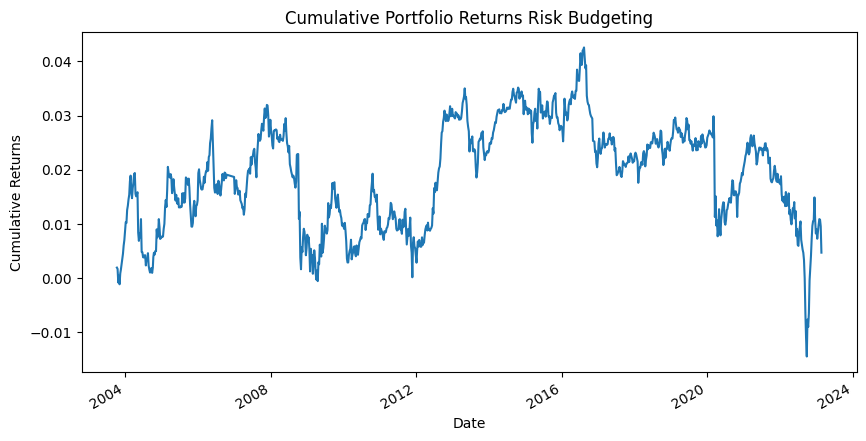

In [ ]:
plt.figure(figsize=(10, 5))
portfolio_returns.sum(axis=1).cumsum().plot(title='Cumulative Portfolio Returns Risk Budgeting')
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.show()
